In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os

In [22]:
energy_csv = pd.read_csv("energy_census.csv", low_memory = False)
energy_df = pd.DataFrame(energy_csv)
energy_df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [9]:
pollutioncsv = pd.read_csv("pollution.csv", low_memory = False)
pollution_df = pd.DataFrame(pollutioncsv)
pollution_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
Unnamed: 0           int64
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(10), object(9)
memory usage: 386.5+ MB


In [39]:
pollution_df["SO2 Mean"].astype('float')
pollution_df["NO2 Mean"].astype('float')
pollution_df["CO Mean"].astype('float')

newdf = pd.DataFrame(pollution_df.groupby("State")["SO2 Mean"].mean())
newdf["CO Mean"] = pollution_df.groupby("State")["CO Mean"].mean()
newdf["NO2 Mean"] = pollution_df.groupby("State")["NO2 Mean"].mean()
newdf.reset_index()
newdf.head()

,SO2 Mean,CO Mean,NO2 Mean
State,,,
Alabama,1.034236,0.212607,9.410693
Alaska,6.083755,0.423438,11.313152
Arizona,1.364213,0.490616,19.067975
Arkansas,1.383302,0.422393,9.753701
California,1.146695,0.447485,13.651894


In [43]:
newdf = newdf.merge(energy_df[["CoalC2014", "CoalP2014", "CoalE2014", "ElecC2014", "ElecE2014", "FossFuelC2014", "NatGasE2014", "HydroP2014", "GeoP2014", "State"]], on='State', how = 'left')
newdf.head()

#I merged the Data Sets so that the final data table has all the imformation on emissions and energy consumption by power source, for each state

,State,SO2 Mean,CO Mean,NO2 Mean,CoalC2014,CoalP2014,CoalE2014,ElecC2014,ElecE2014,FossFuelC2014,NatGasE2014,HydroP2014,GeoP2014
0,Alabama,1.034236,0.212607,9.410693,575912.0,414366.0,1677.3,308765.0,8363.3,1724891.0,3521.2,9467.0,0.0
1,Alaska,6.083755,0.423438,11.313152,18225.0,22944.0,88.8,21034.0,1055.8,581369.0,480.8,1539.0,0.0
2,Arizona,1.364213,0.490616,19.067975,447849.0,173337.0,944.6,260328.0,7764.4,1256577.0,2155.7,6118.0,0.0
3,Arkansas,1.383302,0.422393,9.753701,339214.0,1864.0,820.9,160638.0,3703.5,939788.0,1849.4,2640.0,0.0
4,California,1.146695,0.447485,13.651894,39486.0,0.0,135.3,895939.0,39424.1,5702418.0,16127.9,16531.0,12102.0


In [45]:
SO2 = newdf["SO2 Mean"]
NO2 = newdf["NO2 Mean"]
CO = newdf["CO Mean"]
coalC = newdf["CoalC2014"]
coalP = newdf["CoalP2014"]
coalE = newdf["CoalE2014"]
elecC = newdf["ElecC2014"]
elecE = newdf["ElecE2014"]
fossil = newdf["FossFuelC2014"]
geo = newdf["GeoP2014"]
hydro = newdf["HydroP2014"]
state = newdf["State"]


<Figure size 720x720 with 0 Axes>

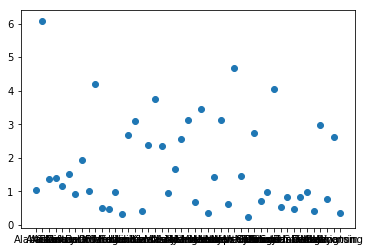

<Figure size 720x720 with 0 Axes>

In [56]:
plt.figure(figsize=(10,10))
coalC_plot = plt.scatter(state, SO2)
